<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Selecting Data with Pandas: _Masking_

_Authors: Dave Yerrington (SF)_

In [1]:
import pandas as pd

### Basic Data Example

In [8]:
data = [
    (4, 100, "Bacon"),
    (2, 150, "Frantz"),
    (10, 1000, "Frantz"),
    (15, 1500, "Bacon"),
]

df = pd.DataFrame(data, columns=["Hour", "Events", "Category"])
df

Hour  Events Category
0     4     100    Bacon
1     2     150   Frantz
2    10    1000   Frantz
3    15    1500    Bacon

### Selecting only values within "Hour" greater than 9

In [9]:
df[ df['Hour'] > 9]

Hour  Events Category
2    10    1000   Frantz
3    15    1500    Bacon

### How does this work exactly?
When we specify the condition `df['Hour'] > 9`, that actually creates a `boolean series` (or you can also think of it as a boolean vector).  Every offset of that boolean vector cooresponds to each row (axis 0).  Anything with a value of `False`, cooresponds to the condition specified for that row.

In the first 2 rows, the **"Hour"** does not meet the condition, **`> 9`**, so the row indexes for those rows within the `boolean series`, are `False`.

In [10]:
my_mask = df['Hour'] > 9
my_mask

0    False
1    False
2     True
3     True
Name: Hour, dtype: bool

In [11]:
df[my_mask]

Hour  Events Category
2    10    1000   Frantz
3    15    1500    Bacon

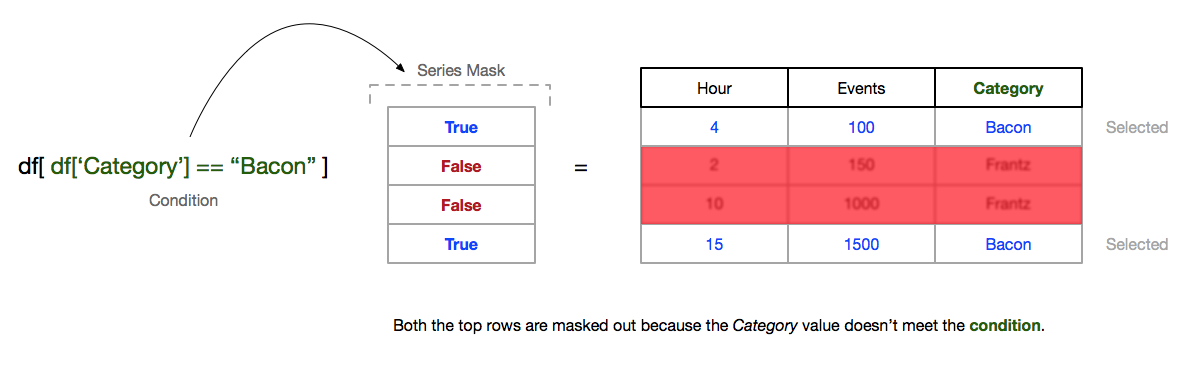

In [12]:
bacon_mask = df['Category'] == "Bacon"
bacon_mask

0     True
1    False
2    False
3     True
Name: Category, dtype: bool

In [14]:
df[bacon_mask]

Hour  Events Category
0     4     100    Bacon
3    15    1500    Bacon

### Masking operators
Selecting the opposite (not "Bacon")

In [18]:
df[~bacon_mask]

Hour  Events Category
1     2     150   Frantz
2    10    1000   Frantz

Multiple conditions.

"and" ie: &

In [19]:
df[(df['Events'] > 150) & (df['Hour'] < 15)]

Hour  Events Category
2    10    1000   Frantz

"or" ie: |

In [22]:
df[(df['Events'] > 150) | (df['Hour'] > 15)]

Hour  Events Category
2    10    1000   Frantz
3    15    1500    Bacon

#### Built-in functions
`series.isin([list])` is handy for checking if a series value equals any list of values.

In [23]:
df[ df['Hour'].isin([4, 15]) ]

Hour  Events Category
0     4     100    Bacon
3    15    1500    Bacon

For a full list of functions that work with seris, which can be used for testing truth values of your series data, check out [the docs](https://pandas.pydata.org/pandas-docs/stable/api.html#series).

### Experimantal `query` features available since Pandas v.13

A pretty cool, yet not yet stable feature in Pandas, is the [`query()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html#pandas.DataFrame.query) function.  It can help clean up long conditional statements between your brackets.  We've found it's not always reliable but it can be a handy method to use for quick access to your data.

In [27]:
df.query("Hour > 9")

Hour  Events Category
2    10    1000   Frantz
3    15    1500    Bacon

In [30]:
df.query("Hour > 9 & Category == 'Frantz'")

Hour  Events Category
2    10    1000   Frantz